In [182]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load specific forecasting tools
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [183]:
path_to_data = 'https://raw.githubusercontent.com/bashirmohd/DataSceince/master/Time-series-prediction_production/aofa_lond_in_out_links.csv'

In [184]:
df = pd.read_csv(path_to_data)

In [185]:
df.head()

,Days,In_Speed,Out_Speed
0,16/10/2018 00:00,408.349690,690.415634
1,16/10/2018 01:00,457.998735,762.059386
2,16/10/2018 02:00,424.732987,675.971718
3,16/10/2018 03:00,354.733448,620.564280
4,16/10/2018 04:00,362.946799,667.688283


In [186]:
df.tail()

,Days,In_Speed,Out_Speed
2155,13/01/2019 19:00,119.590209,218.709408
2156,13/01/2019 20:00,97.765101,208.164222
2157,13/01/2019 21:00,81.826164,215.351361
2158,13/01/2019 22:00,187.980324,323.162112
2159,13/01/2019 23:00,203.064999,305.765805


In [187]:
df.shape

(2160, 3)

Text(0.5,1,'Bandwidth Utitilization Over Time (3-Months)')

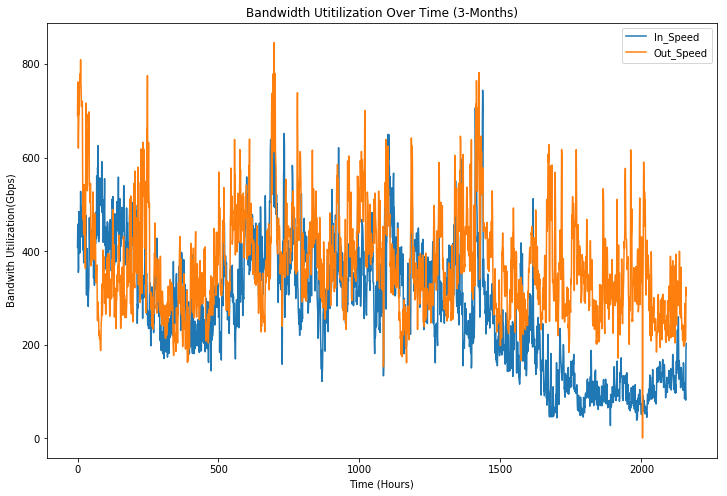

In [188]:
df.plot(figsize=(12,8))
plt.xlabel('Time (Hours)')
plt.ylabel('Bandwith Utilization(Gbps)')
plt.title('Bandwidth Utitilization Over Time (3-Months)')

In [189]:
df['Days'] =  pd.to_datetime(df['Days'], infer_datetime_format=True)

In [190]:
df.dtypes

Days         datetime64[ns]
In_Speed            float64
Out_Speed           float64
dtype: object

In [191]:
df = df.set_index('Days')

In [192]:
df.head()

,In_Speed,Out_Speed
Days,,
2018-10-16 00:00:00,408.349690,690.415634
2018-10-16 01:00:00,457.998735,762.059386
2018-10-16 02:00:00,424.732987,675.971718
2018-10-16 03:00:00,354.733448,620.564280
2018-10-16 04:00:00,362.946799,667.688283


In [193]:
df.columns

Index(['In_Speed', 'Out_Speed'], dtype='object')

In [194]:
average_daily_speed = df.resample('D').mean()

In [195]:
average_daily_speed.dtypes

In_Speed     float64
Out_Speed    float64
dtype: object

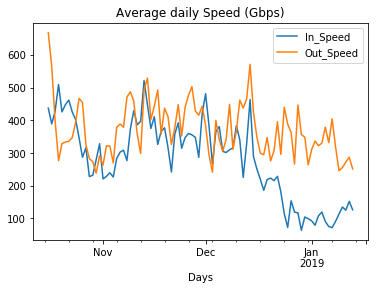

In [196]:
average_daily_speed.plot()
plt.title('Average daily Speed (Gbps)')
plt.show()

In [197]:
#Test for Stationarity
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [198]:
adf_test(df['In_Speed'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -2.922002
p-value                    0.042849
# lags used               25.000000
# observations          2134.000000
critical value (1%)       -3.433418
critical value (5%)       -2.862895
critical value (10%)      -2.567492
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [199]:
adf_test(df['Out_Speed'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.288254e+00
p-value                 4.331419e-13
# lags used             5.000000e+00
# observations          2.154000e+03
critical value (1%)    -3.433390e+00
critical value (5%)    -2.862883e+00
critical value (10%)   -2.567485e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [200]:
#from pylab import rcParams
#rcParams['figure.figsize'] = 12, 8
#decomposition = sm.tsa.seasonal_decompose(df['In_Speed'], model='additive')
#fig = decomposition.plot()
#plt.show()

In [201]:
average_daily_speed = df.resample('D').mean()
average_daily_speed.dtypes

In_Speed     float64
Out_Speed    float64
dtype: object

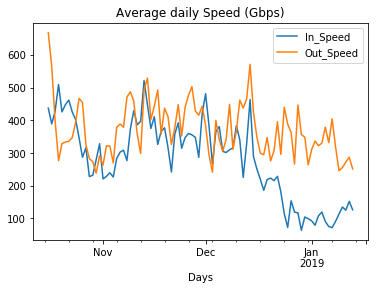

In [202]:
average_daily_speed.plot()
plt.title('Average daily Speed (Gbps)')
plt.show()

In [203]:
average_daily_speed.head()

,In_Speed,Out_Speed
Days,,
2018-10-16,437.322709,668.236505
2018-10-17,389.297759,565.362320
2018-10-18,428.162168,398.529560
2018-10-19,509.773571,276.883716
2018-10-20,425.864657,329.079479


In [204]:
df_av = average_daily_speed

In [205]:
df_av.head()

,In_Speed,Out_Speed
Days,,
2018-10-16,437.322709,668.236505
2018-10-17,389.297759,565.362320
2018-10-18,428.162168,398.529560
2018-10-19,509.773571,276.883716
2018-10-20,425.864657,329.079479


In [152]:
df_av.tail()

,In_Speed,Out_Speed
Days,,
2019-01-09,113.414866,246.063962
2019-01-10,135.131709,255.718699
2019-01-11,125.451465,272.797631
2019-01-12,152.480680,287.178498
2019-01-13,126.516942,251.450144


In [232]:
df_av.shape

(90, 2)

In [233]:
#df.shape

In [234]:
# NUm of Observations
nobs = 24

In [235]:
train = df_av[0:-nobs] #Start=  begining of df--> -24 from the end

In [236]:
test = df_av[-nobs:]# start -24 from the end of the DF ---> go to the end of DF

In [237]:
print(train.shape)
print(test.shape)

(66, 2)
(24, 2)


In [238]:
test

,In_Speed,Out_Speed
Days,,
2018-12-21,215.879720,306.440569
2018-12-22,228.973823,395.635975
2018-12-23,181.240180,296.084513
2018-12-24,114.956234,440.358917
2018-12-25,72.512225,388.518913
2018-12-26,154.237042,363.306233
2018-12-27,119.583671,266.616529
2018-12-28,117.028806,447.063789
2018-12-29,63.865425,356.737656


In [239]:
model = VAR(train)

for p in [1,2,3,4,5,6,7]:
    
    results = model.fit(p)
    print(f'ORDER {p}')
    print(f'AIC: {results.aic}')
    print('\n')
    

ORDER 1
AIC: 16.592670841568637


ORDER 2
AIC: 16.644200391460043


ORDER 3
AIC: 16.544704765577784


ORDER 4
AIC: 16.45182205421273


ORDER 5
AIC: 16.404845515221865


ORDER 6
AIC: 16.500231334635505


ORDER 7
AIC: 16.606467085460984




In [214]:
results = model.fit(5)

In [215]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 17, Jun, 2019
Time:                     09:40:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    17.1661
Nobs:                     61.0000    HQIC:                   16.7032
Log likelihood:          -651.458    FPE:                1.34276e+07
AIC:                      16.4048    Det(Omega_mle):     9.63811e+06
--------------------------------------------------------------------
Results for equation In_Speed
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               47.942226        60.507590            0.792           0.428
L1.In_Speed          0.696935         0.148927            4.680           0.000
L1.Out_Speed         0.013309         0.140345            0.0

In [216]:
#Grab the 5 Lagged Values, right before the test stats
# Numpy Array
train.values.shape

(66, 2)

In [217]:
train.values[-5:].shape

(5, 2)

In [218]:
lagged_values = train.values[-5:] #lagged order = 6, k= 2(2 time series variables)

In [219]:
z = results.forecast(y=lagged_values,steps=24)

In [220]:
z

array([[241.49083835, 292.12432821],
       [252.81935235, 339.61325108],
       [258.78255029, 359.36816778],
       [287.2444256 , 368.95582512],
       [290.86780724, 391.21829785],
       [281.71212408, 392.63135623],
       [294.61793947, 392.25863057],
       [311.28437356, 396.38231292],
       [309.04078011, 385.88706318],
       [311.7461366 , 377.31093491],
       [322.65972464, 383.3100258 ],
       [325.51328567, 383.61243999],
       [324.92137479, 378.38532079],
       [326.97759192, 382.1618286 ],
       [326.32912587, 386.2854857 ],
       [324.92518497, 383.95873685],
       [325.48765761, 383.32031413],
       [324.18317526, 384.12608206],
       [322.47302386, 382.22827972],
       [323.39727621, 381.13968556],
       [323.67778883, 381.3911955 ],
       [322.39493122, 380.41542248],
       [322.45245141, 380.15846874],
       [322.97258483, 381.20659795]])

In [221]:
test

,In_Speed,Out_Speed
Days,,
2018-12-21,215.879720,306.440569
2018-12-22,228.973823,395.635975
2018-12-23,181.240180,296.084513
2018-12-24,114.956234,440.358917
2018-12-25,72.512225,388.518913
2018-12-26,154.237042,363.306233
2018-12-27,119.583671,266.616529
2018-12-28,117.028806,447.063789
2018-12-29,63.865425,356.737656


In [240]:
df_av.columns

Index(['In_Speed', 'Out_Speed'], dtype='object')

In [241]:
idx = pd.date_range('2018-12-21', periods =24, freq='D')

In [242]:
idx

DatetimeIndex(['2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01',
               '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13'],
              dtype='datetime64[ns]', freq='D')

In [243]:
df_av_forecast = pd.DataFrame(data=z,index=idx,columns=['aofa_lon_In_speed_f','aofa_lon_out_speed_f'])

In [244]:
df_av_forecast.head()

,aofa_lon_In_speed_f,aofa_lon_out_speed_f
2018-12-21,241.490838,292.124328
2018-12-22,252.819352,339.613251
2018-12-23,258.782550,359.368168
2018-12-24,287.244426,368.955825
2018-12-25,290.867807,391.218298


In [245]:
df_av.head()

,In_Speed,Out_Speed
Days,,
2018-10-16,437.322709,668.236505
2018-10-17,389.297759,565.362320
2018-10-18,428.162168,398.529560
2018-10-19,509.773571,276.883716
2018-10-20,425.864657,329.079479


In [246]:
 df1 = df_av_forecast.join(df_av)

In [247]:
df1.shape

(24, 4)

In [248]:
df1

,aofa_lon_In_speed_f,aofa_lon_out_speed_f,In_Speed,Out_Speed
2018-12-21,241.490838,292.124328,215.879720,306.440569
2018-12-22,252.819352,339.613251,228.973823,395.635975
2018-12-23,258.782550,359.368168,181.240180,296.084513
2018-12-24,287.244426,368.955825,114.956234,440.358917
2018-12-25,290.867807,391.218298,72.512225,388.518913
2018-12-26,281.712124,392.631356,154.237042,363.306233
2018-12-27,294.617939,392.258631,119.583671,266.616529
2018-12-28,311.284374,396.382313,117.028806,447.063789
2018-12-29,309.040780,385.887063,63.865425,356.737656
2018-12-30,311.746137,377.310935,104.643744,348.820129


In [249]:
test_range = df_av[-nobs:]

In [253]:
test_range

,In_Speed,Out_Speed
Days,,
2018-12-21,215.879720,306.440569
2018-12-22,228.973823,395.635975
2018-12-23,181.240180,296.084513
2018-12-24,114.956234,440.358917
2018-12-25,72.512225,388.518913
2018-12-26,154.237042,363.306233
2018-12-27,119.583671,266.616529
2018-12-28,117.028806,447.063789
2018-12-29,63.865425,356.737656


In [254]:
test_range.shape

(24, 2)

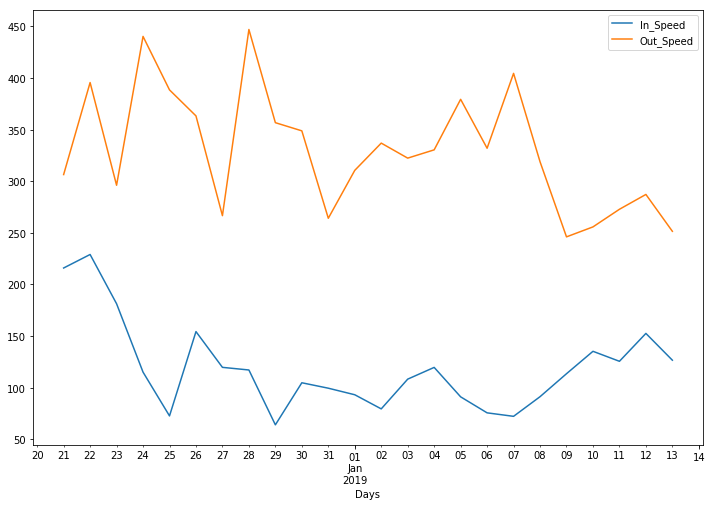

In [252]:
test_range.plot(figsize=(12,8))

In [255]:
df1.columns

Index(['aofa_lon_In_speed_f', 'aofa_lon_out_speed_f', 'In_Speed', 'Out_Speed'], dtype='object')

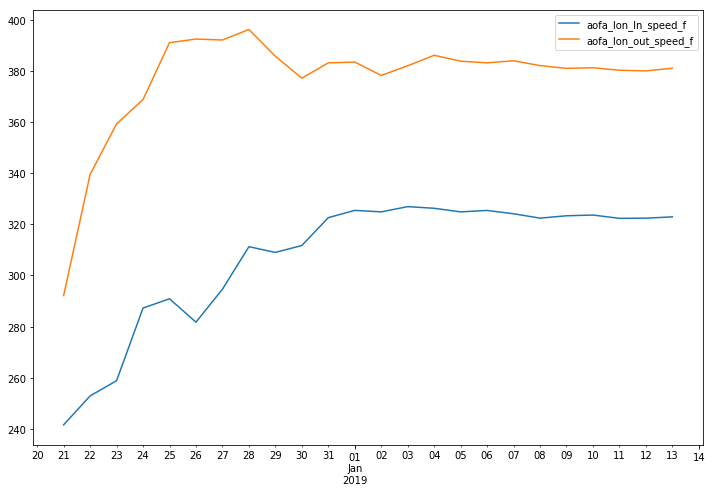

In [256]:
df1[['aofa_lon_In_speed_f','aofa_lon_out_speed_f']].plot(figsize=(12,8))

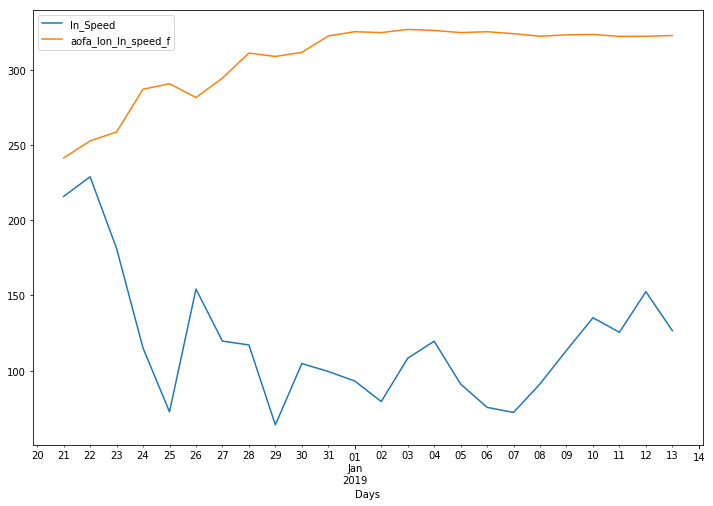

In [257]:
test_range['In_Speed'].plot(legend=True,figsize=(12,8))
df_av_forecast['aofa_lon_In_speed_f'].plot(legend=True)

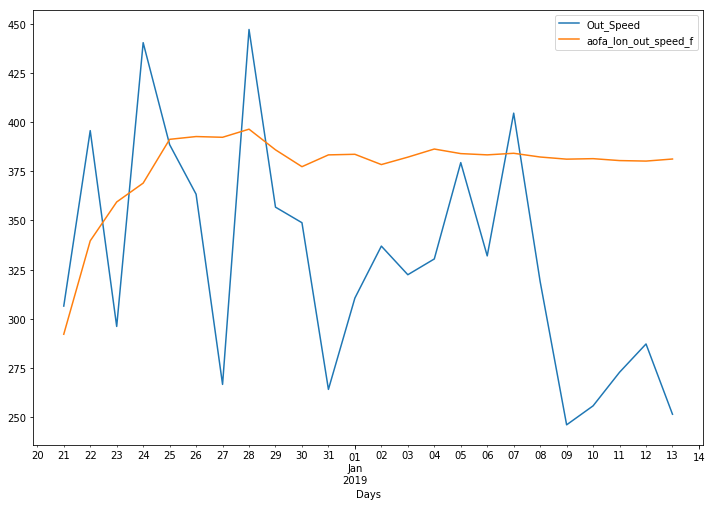

In [258]:
test_range['Out_Speed'].plot(legend=True,figsize=(12,8))
df_av_forecast['aofa_lon_out_speed_f'].plot(legend=True)

In [262]:
rmse(test_range['In_Speed'],df_av_forecast['aofa_lon_In_speed_f'])

198.67149408080488

In [263]:
test_range['In_Speed'].mean()

118.9610396522222

In [264]:
rmse(test_range['Out_Speed'],df_av_forecast['aofa_lon_out_speed_f'])

76.23831786965066

In [265]:
test_range['Out_Speed'].mean()

330.0768075232864